In [24]:
import pingouin as pg
import numpy as np
import pandas as pd

# Load the provided Excel file to examine its contents
file_path = 'Sat9surrond.xlsx'
xls = pd.ExcelFile(file_path)

# Check the sheet names to identify where the "Tidy" data is located
xls.sheet_names


# Load the 'Tidy' sheet to analyze the data
tidy_data = pd.read_excel(file_path, sheet_name='tidy')

# Display the first few rows of the dataset to understand its structure
tidy_data_clean.head()


# Prepare the data for the mixed-design ANOVA
# We need to ensure that HITS column is numeric
tidy_data_clean['HITS'] = pd.to_numeric(tidy_data['HITS'], errors='coerce')

# Perform mixed-design ANOVA: between-subject factor is 'Phenotype', within-subject is 'time_block' and 'Stimulus_duration'
anova_results = pg.mixed_anova(
    dv='HITS', # Dependent variable
    within='time_block', # Repeated measure (within-subject)
    between='Phenotype', # Between-subject factor
    subject='animal', # Each animal represents a subject
    data=tidy_data_clean
)

# Calculate generalized eta-squared for effect size
anova_results['generalized_eta_sq'] = pg.compute_effsize(
    anova_results['F'], 
    anova_results['df1'], 
    anova_results['df2'], 
    eftype='generalized_eta_squared'
)

# Post-hoc analysis with Bonferroni correction if main effects or interactions are significant
posthoc_results = None
if anova_results['p-unc'].min() < 0.05:
    posthoc_results = pg.pairwise_tests(
        dv='HITS', 
        within='time_block', 
        subject='animal', 
        between='Phenotype', 
        data=tidy_data, 
        padjust='bonferroni'
    )

anova_results, posthoc_results


KeyError: 'df1'

In [21]:
# Check for missing values
print(tidy_data.isnull().sum())

# Optionally, drop rows with missing values in the 'HITS' column
tidy_data_clean = tidy_data.dropna(subset=['HITS'])


Phenotype              0
animal                 0
time_block            17
Stimulus_duration     17
CR                   663
FA                   646
HITS                 646
Misses               646
OM                   663
dtype: int64


In [7]:
# Convert columns to categorical if needed
tidy_data_clean['Phenotype'] = tidy_data_clean['Phenotype'].astype('category')
tidy_data_clean['time_block'] = tidy_data_clean['time_block'].astype('category')
tidy_data_clean['Stimulus_duration'] = tidy_data_clean['Stimulus_duration'].astype('category')


C:\Users\pfh3221\AppData\Local\Temp\ipykernel_24940\3459616901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tidy_data_clean['Phenotype'] = tidy_data_clean['Phenotype'].astype('category')
C:\Users\pfh3221\AppData\Local\Temp\ipykernel_24940\3459616901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tidy_data_clean['time_block'] = tidy_data_clean['time_block'].astype('category')
C:\Users\pfh3221\AppData\Local\Temp\ipykernel_24940\3459616901.py:4: SettingWithCopyWarning: 
A value is trying to be set 

In [6]:
# Drop rows where 'HITS', 'time_block', or 'Stimulus_duration' are missing
tidy_data_clean = tidy_data.dropna(subset=['HITS', 'time_block', 'Stimulus_duration'])

# Check the cleaned data
print(tidy_data_clean.isnull().sum())


Phenotype              0
animal                 0
time_block             0
Stimulus_duration      0
CR                   272
FA                   272
HITS                   0
Misses               272
OM                   272
dtype: int64


In [11]:
# Convert 'HITS' to numeric, coercing any non-numeric values to NaN
tidy_data_clean['HITS'] = pd.to_numeric(tidy_data_clean['HITS'], errors='coerce')

# Check if the conversion worked and see if there are any remaining non-numeric entries
print(tidy_data_clean['HITS'].dtype)
print(tidy_data_clean['HITS'].isnull().sum())


float64
0


In [22]:
# Check for unique values of each factor
print(tidy_data_clean['Phenotype'].unique())
print(tidy_data_clean['time_block'].unique())
print(tidy_data_clean['Stimulus_duration'].unique())


['GT' 'IN' 'ST']
["'min 1 à 4'" "'min 12 à 16'" "'min 16 à 20'" "'min 20 à 24'"
 "'min 28 à 32'" "'min 32 à 36'" "'min 36 à 40'" "'min 8 à 12'" nan]
["'CUE25msec'" "'CUE500msec'" "'CUE50msec'" "'Nocue'" "'CUE500msec'''"
 "'CUE50msec'''" nan]


In [23]:
# Convert categorical variables to 'category' type
tidy_data_clean['Phenotype'] = tidy_data_clean['Phenotype'].astype('category')
tidy_data_clean['time_block'] = tidy_data_clean['time_block'].astype('category')
tidy_data_clean['Stimulus_duration'] = tidy_data_clean['Stimulus_duration'].astype('category')

# Ensure 'HITS' is numeric
tidy_data_clean['HITS'] = pd.to_numeric(tidy_data_clean['HITS'], errors='coerce')

# Check the data types
print(tidy_data_clean.dtypes)


Phenotype            category
animal                float64
time_block           category
Stimulus_duration    category
CR                    float64
FA                     object
HITS                  float64
Misses                 object
OM                    float64
dtype: object


C:\Users\pfh3221\AppData\Local\Temp\ipykernel_24940\2559119940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tidy_data_clean['Phenotype'] = tidy_data_clean['Phenotype'].astype('category')
C:\Users\pfh3221\AppData\Local\Temp\ipykernel_24940\2559119940.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tidy_data_clean['time_block'] = tidy_data_clean['time_block'].astype('category')
C:\Users\pfh3221\AppData\Local\Temp\ipykernel_24940\2559119940.py:4: SettingWithCopyWarning: 
A value is trying to be set 

In [19]:
# Convert 'animal' to a string, since it's a label and not a numeric variable
tidy_data_clean['animal'] = tidy_data_clean['animal'].astype(str)

# Convert 'FA' and 'Misses' to numeric (float64), coercing any non-numeric values to NaN
tidy_data_clean['FA'] = pd.to_numeric(tidy_data_clean['FA'], errors='coerce')
tidy_data_clean['Misses'] = pd.to_numeric(tidy_data_clean['Misses'], errors='coerce')

# Verify the changes
print(tidy_data_clean.dtypes)


Phenotype            category
animal                 object
time_block           category
Stimulus_duration    category
CR                    float64
FA                    float64
HITS                  float64
Misses                float64
OM                    float64
dtype: object


In [25]:
# Check unique values for each factor
print("Unique values for Phenotype:")
print(tidy_data_clean['Phenotype'].unique())

print("Unique values for time_block:")
print(tidy_data_clean['time_block'].unique())

print("Unique values for Stimulus_duration:")
print(tidy_data_clean['Stimulus_duration'].unique())

# Check if there are missing values after cleaning
print(tidy_data_clean[['Phenotype', 'animal', 'time_block', 'Stimulus_duration', 'HITS']].isnull().sum())


Unique values for Phenotype:
['GT', 'IN', 'ST']
Categories (3, object): ['GT', 'IN', 'ST']
Unique values for time_block:
[''min 1 à 4'', ''min 12 à 16'', ''min 16 à 20'', ''min 20 à 24'', ''min 28 à 32'', ''min 32 à 36'', ''min 36 à 40'', ''min 8 à 12'', NaN]
Categories (8, object): [''min 1 à 4'', ''min 12 à 16'', ''min 16 à 20'', ''min 20 à 24'', ''min 28 à 32'', ''min 32 à 36'', ''min 36 à 40'', ''min 8 à 12'']
Unique values for Stimulus_duration:
[''CUE25msec'', ''CUE500msec'', ''CUE50msec'', ''Nocue'', ''CUE500msec'''', ''CUE50msec'''', NaN]
Categories (6, object): [''CUE25msec'', ''CUE500msec'', ''CUE500msec'''', ''CUE50msec'', ''CUE50msec'''', ''Nocue'']
Phenotype             0
animal                0
time_block           17
Stimulus_duration    17
HITS                 17
dtype: int64


In [26]:
# Simple ANOVA (ignoring the within-subject factor 'time_block')
anova_simple = pg.anova(dv='HITS', between=['Phenotype', 'Stimulus_duration'], data=tidy_data_clean)
print(anova_simple)


                          Source           SS     DF          MS           F  \
0                      Phenotype     4.287883    2.0    2.143941    1.233315   
1              Stimulus_duration  1044.529746    5.0  208.905949  120.174358   
2  Phenotype * Stimulus_duration     6.113930   10.0    0.611393    0.351707   
3                       Residual   618.855131  356.0    1.738357         NaN   

          p-unc       np2  
0  2.925670e-01  0.006881  
1  3.324528e-74  0.627954  
2  9.657577e-01  0.009783  
3           NaN       NaN  


In [27]:
anova_results = pg.mixed_anova(
    dv='HITS', 
    within='time_block', 
    between='Phenotype', 
    subject='animal', 
    data=tidy_data_clean
)

# Print results
print(anova_results)


        Source         SS  DF1  DF2        MS          F         p-unc  \
0    Phenotype   0.672273    2   14  0.336136   1.015842  3.872952e-01   
1   time_block  48.276961    7   98  6.896709  22.600925  6.041651e-18   
2  Interaction   7.209675   14   98  0.514977   1.687610  7.033473e-02   

      p-GG-corr       np2       eps sphericity   W-spher   p-spher  
0           NaN  0.126729       NaN        NaN       NaN       NaN  
1  1.313361e-08  0.617496  0.417711      False  0.003753  0.000003  
2           NaN  0.194255       NaN        NaN       NaN       NaN  


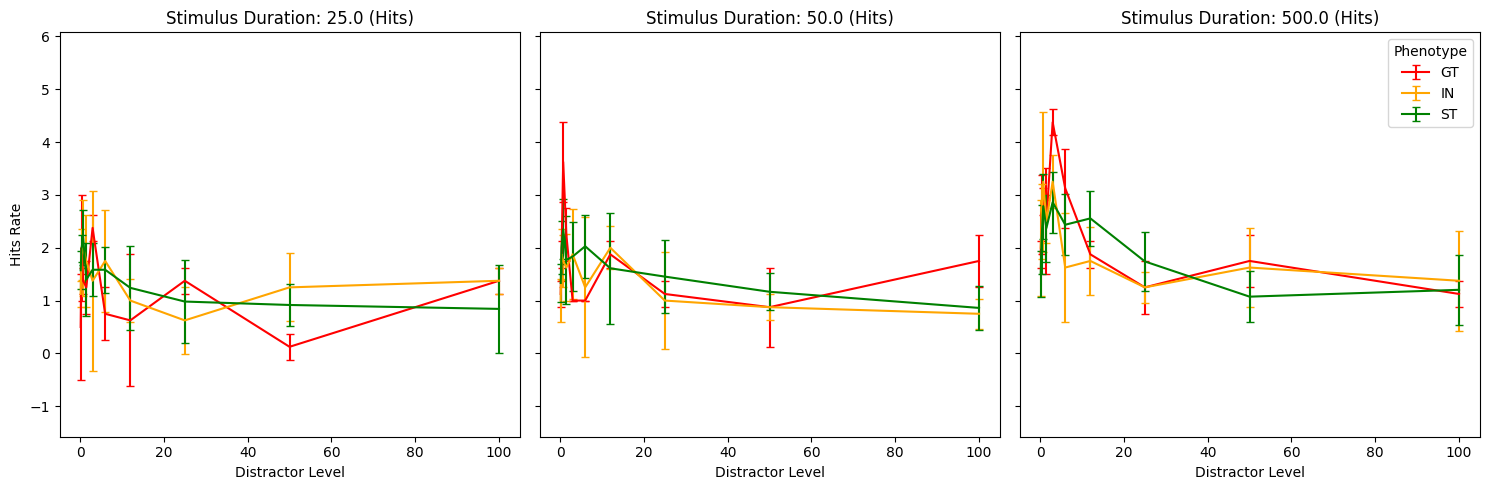

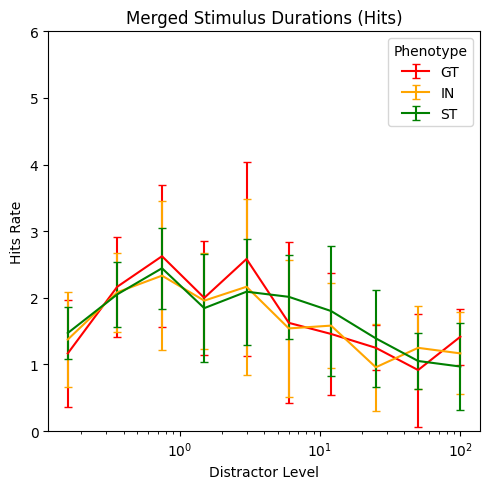

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file and the 'Tidy_Hitmiss' sheet
file_path = 'Sat9surrond.xlsx'
xls = pd.ExcelFile(file_path)
tidy_hitmiss_df = pd.read_excel(xls, sheet_name='Tidy_Hitmiss')

# Filter out necessary data
stimulus_durations = tidy_hitmiss_df['stimulus_duration'].unique()
phenotypes = tidy_hitmiss_df['phenotype'].unique()

# Prepare a dictionary to map phenotypes to colors
colors = {'ST': 'green', 'IN': 'orange', 'GT': 'red'}

# Prepare to calculate the mean and standard deviation for each combination (using Misses)
grouped_misses_data = tidy_hitmiss_df.groupby(['stimulus_duration', 'Distractor_level', 'phenotype']).agg({
    'Hits': ['mean', 'std']
}).reset_index()

# Prepare for plotting Misses
fig, axs = plt.subplots(1, len(stimulus_durations), figsize=(15, 5), sharey=True)

# Set common Y limit for all graphs for Misses
y_min_misses = grouped_misses_data['Hits']['mean'].min() - grouped_misses_data['Hits']['std'].max()
y_max_misses = grouped_misses_data['Hits']['mean'].max() + grouped_misses_data['Hits']['std'].max()

# Plot each stimulus duration for Misses in separate subplots
for i, duration in enumerate(stimulus_durations):
    ax = axs[i]
    
    # Filter the data for the current stimulus duration
    duration_data = grouped_misses_data[grouped_misses_data['stimulus_duration'] == duration]
    
    # Plot each phenotype line for Misses
    for phenotype in phenotypes:
        phenotype_data = duration_data[duration_data['phenotype'] == phenotype]
        ax.errorbar(phenotype_data['Distractor_level'], 
                    phenotype_data['Hits']['mean'], 
                    yerr=phenotype_data['Hits']['std'], 
                    label=phenotype, 
                    color=colors[phenotype], 
                    capsize=3)
    
    # Set axis labels and title
    ax.set_xlabel('Distractor Level')
    ax.set_title(f'Stimulus Duration: {duration} (Hits)')
    ax.set_ylim([y_min_misses, y_max_misses])

# Set common Y label
axs[0].set_ylabel('Hits Rate')

# Add legend and adjust layout
axs[-1].legend(title='Phenotype')
plt.tight_layout()
plt.show()

# Now for the merged data for Misses (ignoring stimulus duration distinction)
merged_misses_data = tidy_hitmiss_df.groupby(['Distractor_level', 'phenotype']).agg({
    'Hits': ['mean', 'std']
}).reset_index()

# Plot the merged data for Misses
plt.figure(figsize=(5, 5))

for phenotype in phenotypes:
    phenotype_data = merged_misses_data[merged_misses_data['phenotype'] == phenotype]
    plt.errorbar(phenotype_data['Distractor_level'], 
                 phenotype_data['Hits']['mean'], 
                 yerr=phenotype_data['Hits']['std'], 
                 label=phenotype, 
                 color=colors[phenotype], 
                 capsize=3)

plt.xlabel('Distractor Level')
plt.ylabel('Hits Rate')
plt.ylim([y_min_misses, y_max_misses])
plt.ylim([0, 6])
plt.xscale('log')
plt.title('Merged Stimulus Durations (Hits)')
plt.legend(title='Phenotype')
plt.tight_layout()
plt.show()